In [2]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [9]:
# Understand the Iris dataset...
iris = load_iris()

In [16]:
for _ in dir(iris):
    print(_)

DESCR
data
feature_names
filename
target
target_names


In [28]:
getattr(iris, dir(iris)[5])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
# Understand the wine dataset
wine = load_wine()
for _ in dir(wine):
    print(_)

DESCR
data
feature_names
target
target_names


In [35]:
getattr(wine, dir(wine)[4])

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [38]:
# Let us do Iris dataset first...
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [58]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :2], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

{0.0, 1.0}


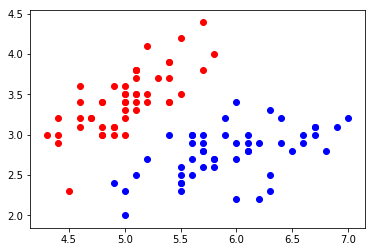

In [61]:
print(set(y))
colorcode = {0:'r', 1:'b'}
for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], c = colorcode[int(y[i])])
plt.show()

In [68]:
class LogisticRegressionClassifier:
    def __init__(self, max_iter = 200, learning_rate = 0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
    def sigmoid(self, x):
        return 1/(1 + exp(-x))
    
    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat
    
    def fit(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)
        self.weights = np.zeros( (len(data_mat[0]), 1), dtype = np.float32)
        
        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                
                result = self.sigmoid( np.dot(data_mat[i], self.weights) )
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])
        print('LogisticRegression Model(learning_rate={}, max_iter={})'.format(
        self.learning_rate, self.max_iter))
        
    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right/len(X_test)

In [69]:
lr_clf = LogisticRegressionClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01, max_iter=200)


In [70]:
lr_clf.score(X_test, y_test)

1.0

# WINE Dataset using sklearn

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
clf = LogisticRegression(max_iter = 200)

In [73]:
wine = load_wine()

In [78]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [80]:
df['label'] = wine.target

In [81]:
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685.0,2
83,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515.0,1
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0,2


In [82]:
data = np.array(df.iloc[:, :])

In [84]:
X, y = data[:, :-1], data[:, -1]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [89]:
clf.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
clf.score(X_test, y_test)

0.9444444444444444

# Use cross validation method

In [114]:
from sklearn.model_selection import cross_validate
cv_result = cross_validate(LogisticRegression(), X, y, cv = 10,
                          return_estimator=True)





/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

In [115]:
cv_result.keys()

dict_keys(['fit_time', 'score_time', 'estimator', 'test_score'])

In [116]:
cv_result['test_score']

array([0.84210526, 0.94444444, 0.94444444, 0.94444444, 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [117]:
cv_result['test_score'].mean()

0.9564327485380117

In [118]:
for clf in cv_result['estimator']:
    print(clf.score(X_test, y_test))


0.9444444444444444
0.9629629629629629
0.9629629629629629
0.9444444444444444
0.9629629629629629
0.9629629629629629
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444
